## Model testing
I will test Linear Regression, Knn, and Random Forest. Logistic Regression will not be used because it is intended for classification rather than prediction of continuous values.

In [1]:
import pandas as pd
from taxipred.utils.constants import CLEANED_DATA_PATH
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv(CLEANED_DATA_PATH)
df

,Trip_Distance_km,Day_of_Week,Traffic_Conditions,Weather,Trip_Duration_Minutes,Trip_Price
0,19.35,Weekday,Low,Clear,53.82,36.2624
1,36.87,Weekend,High,Clear,37.27,52.9032
2,8.64,Weekend,Medium,Clear,89.33,60.2028
3,3.85,Weekday,High,Rain,5.05,11.2645
4,41.79,Weekend,High,Clear,86.95,88.1328
...,...,...,...,...,...,...
713,5.49,Weekend,Medium,Clear,58.39,34.4049
714,45.95,Weekday,Medium,Clear,61.96,62.1295
715,7.70,Weekday,Low,Rain,54.18,33.1236
716,47.56,Weekday,Low,Clear,114.94,61.2090


## Linear regression testing

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [3]:
X = df[["Trip_Distance_km", "Day_of_Week", "Traffic_Conditions", "Weather", "Trip_Duration_Minutes"]]
y = df["Trip_Price"]

In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718 entries, 0 to 717
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       718 non-null    float64
 1   Day_of_Week            718 non-null    object 
 2   Traffic_Conditions     718 non-null    object 
 3   Weather                718 non-null    object 
 4   Trip_Duration_Minutes  718 non-null    float64
dtypes: float64(2), object(3)
memory usage: 28.2+ KB


### Make the objects to numbers

In [5]:
X = pd.get_dummies(X, columns=["Day_of_Week", "Traffic_Conditions", "Weather"], drop_first=True)
X.head()


,Trip_Distance_km,Trip_Duration_Minutes,Day_of_Week_Weekend,Traffic_Conditions_Low,Traffic_Conditions_Medium,Weather_Rain,Weather_Snow
0,19.35,53.82,False,True,False,False,False
1,36.87,37.27,True,False,False,False,False
2,8.64,89.33,True,False,True,False,False
3,3.85,5.05,False,False,False,True,False
4,41.79,86.95,True,False,False,False,False


### 1. Train|test split

In [6]:
# Llm used to decide which test size to use
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((574, 7), (144, 7), (574,), (144,))

### 2. Feature scaling

In [8]:
scaler = MinMaxScaler()
scaler.fit(X_train)

scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

print(f"{scaled_X_train.min():.2f} ≤ scaled_X_train ≤ {scaled_X_train.max():.2f}")
print(f"{scaled_X_test.min():.2f} ≤ scaled_X_test ≤ {scaled_X_test.max():.2f}")



0.00 ≤ scaled_X_train ≤ 1.00
0.00 ≤ scaled_X_test ≤ 1.00


### 3. Linear regression

In [9]:
from sklearn.linear_model import LinearRegression 

model = LinearRegression()
model.fit(scaled_X_train, y_train)

print(f"Parameters: {model.coef_}")
print(f"Intercept parameter: {model.intercept_}")



Parameters: [ 5.75110161e+01  3.31648403e+01 -2.46969726e+00  3.83357502e-01
  2.95429127e-02  4.02975774e-01  4.15088284e+00]
Intercept parameter: 7.189793006845953


### 4. Predict on test data

In [10]:
y_pred = model.predict(scaled_X_test)
print(y_pred)

[51.99981095 79.66327081 35.93891092 13.37318542 70.01241391 51.82508121
 55.48873692 43.61039281 21.32598381 79.68236312 44.78357093 56.78374199
 42.84826257 19.06737119 36.82874605 25.4548422  48.55034415 58.1786047
 76.41145338 66.95488011 66.19250342 71.61093562 37.93446546 60.26472494
 62.17792781 67.74378568 67.15426827 51.38795466 14.26837619 19.35654445
 52.26701861 13.14822059 70.52056463 49.85554954 84.61484836 43.69396437
 85.62157667 34.5028826  66.7242672  73.01727279 73.8326659  66.85446395
 41.72115663 46.52942478 50.7936961  49.27277519 78.28278091 62.15025649
 35.51103515 32.97531339 25.82884741 10.98272077 50.38942591 82.35126609
 79.2426266  21.59748858 64.2910738  75.28165019 32.56905722 50.92575352
 42.6190482  58.24135159 32.10767452 68.53627769 75.8871844  59.76645617
 25.32148846 69.35769104 85.28666599 46.93982136 42.21081133 87.1298011
 27.86669873 44.69676225 65.98296653 50.03317953 38.78731998 21.02804543
 54.28543448 36.80905088 44.11771272 29.65712534 21.1

### 5. Evaluate performance

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mae: {mae} Mse: {mse} Rmse: {rmse}")

Mae: 11.53818207900855 Mse: 216.5299837515505 Rmse: 14.714957823641578


Text(0.5, 1.0, 'Predicted vs actual price in linear regression')

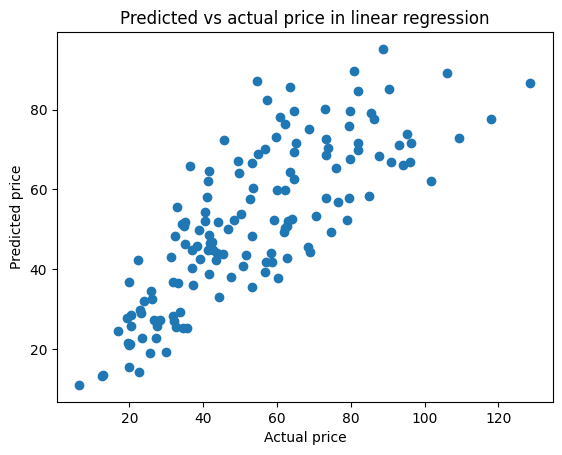

In [12]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Predicted vs actual price in linear regression")


## KNN testing, with regression

### Reusing the same train|test split and scaled features for consistency


In [13]:
from sklearn.neighbors import KNeighborsRegressor

#llm used to get a reasonable number of neighbors
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(scaled_X_train, y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",5
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Uniform weights are used by default.See the following example for a demonstration of the impact ofdifferent weighting schemes on predictions::ref:`sphx_glr_auto_examples_neighbors_plot_regression.py`.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this isequivalent to using manhattan_distance (l1), and euclidean_distance(l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.",2
,"metric metric: str, DistanceMetric object or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.If metric is a DistanceMetric object, it will be passed directly tothe underlying computation routines.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [14]:
y_pred_knn = knn.predict(scaled_X_test)
print(y_pred_knn)

[50.20006 88.08894 38.30924 24.22234 78.15016 41.04478 55.0269  34.45156
 36.41174 48.16848 55.17928 54.27064 57.24848 36.1159  42.30194 30.62404
 38.2323  46.07278 63.43376 55.08984 64.19822 52.9473  32.95766 69.3263
 59.43766 63.357   59.11212 62.28464 19.2689  36.46392 41.04478 26.67922
 77.16776 49.59188 74.64316 37.06792 80.78112 36.70462 76.9037  68.20574
 67.53008 50.0262  44.8622  44.2636  37.28152 42.61804 84.19928 49.77208
 50.89286 34.03266 19.11944 19.1061  47.25    80.7088  96.89128 52.51642
 59.28514 70.89382 33.15746 54.32396 42.74722 51.53102 33.97842 64.45506
 64.91502 64.15186 35.0836  73.05468 88.08894 32.06266 44.19474 74.57532
 28.79444 34.13932 69.38526 44.52858 46.15082 22.411   53.61118 29.45654
 55.17928 29.00758 22.7876  75.37992 24.8278  65.81432 45.01712 48.16848
 78.47374 66.37596 51.2157  27.4383  78.36636 31.49692 96.15958 45.13136
 62.42848 62.42848 44.46004 27.4197  32.42964 99.68592 30.15472 30.57618
 83.4336  37.85104 36.72156 46.70994 80.08004 65.794

In [15]:
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)

print(f"Mae_knn: {mae_knn} Mse_knn: {mse_knn} Rmse_knn: {rmse_knn}")

Mae_knn: 13.30867527777778 Mse_knn: 308.0909648004611 Rmse_knn: 17.552520183736043


Text(0.5, 1.0, 'Predicted vs actual price in knn')

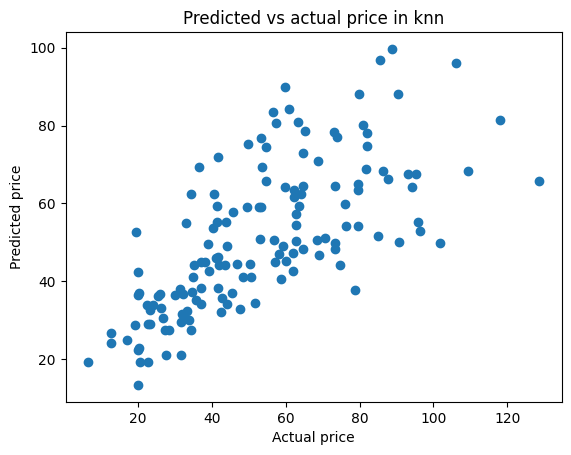

In [16]:
plt.scatter(y_test, y_pred_knn)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Predicted vs actual price in knn")

## Random forest, regression

### No need to use scaled data

In [17]:
from sklearn.ensemble import RandomForestRegressor

# llm used to decide amount of trees 
rf = RandomForestRegressor(n_estimators=100, random_state=42)


In [18]:
rf.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [19]:
y_pred_rf = rf.predict(X_test)
print(y_pred_rf)

[ 53.094863  72.269836  35.142873  11.099363  86.71189   40.254564
  50.604075  42.857561  17.174685  73.404075  45.129924  58.659817
  46.568842  22.865271  41.244417  27.269734  43.027807  47.366458
  80.41592   75.265328  68.619318  71.685773  29.030697  63.535751
  55.534864  68.43912   60.683259  57.901046  14.696982  16.523321
  48.295254   9.551336  87.515831  50.632684  64.149545  46.406356
  78.76422   32.85309   72.162437  71.768256  92.233397  74.295832
  45.986084  48.649338  46.358295  52.371899  63.278371  57.464862
  36.466178  27.908718  22.378367  10.913904  53.175753  91.316265
 102.684114  17.318058  53.664859  87.103307  33.875869  49.159695
  37.500039  49.698262  33.355685  67.704908  59.07026   55.121108
  24.927978  62.844456  93.487446  39.985385  43.82149   78.759982
  33.31751   37.031013  64.502345  41.848221  42.52511   20.898639
  52.597825  37.497316  47.412472  28.194773  17.552176  58.195064
  32.621343  73.828115  43.411302  63.773399  74.963867  63.84

In [20]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print(f"Mae_rf: {mae_rf} Mse_rf: {mse_rf} Rmse_rf: {rmse_rf}")

Mae_rf: 11.533377159722225 Mse_rf: 226.71825294471472 Rmse_rf: 15.057166165806722


Text(0.5, 1.0, 'Predicted vs actual price in rf')

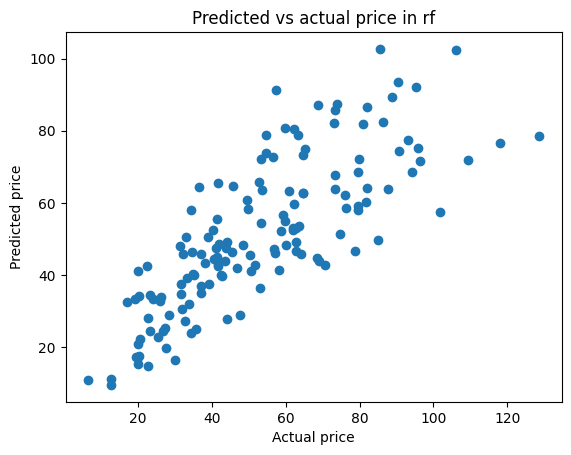

In [21]:
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Predicted vs actual price in rf")

## Comparing the models

In [22]:
print(f"Linear Regression -> Mae: {mae} Mse: {mse} Rmse: {rmse}")
print(f"Knn -> Mae_knn: {mae_knn} Mse_knn: {mse_knn} Rmse_knn: {rmse_knn}")
print(f"Random forest -> Mae_rf: {mae_rf} Mse_rf: {mse_rf} Rmse_rf: {rmse_rf}")

Linear Regression -> Mae: 11.53818207900855 Mse: 216.5299837515505 Rmse: 14.714957823641578
Knn -> Mae_knn: 13.30867527777778 Mse_knn: 308.0909648004611 Rmse_knn: 17.552520183736043
Random forest -> Mae_rf: 11.533377159722225 Mse_rf: 226.71825294471472 Rmse_rf: 15.057166165806722


Text(0.5, 1.0, 'Comparing models by Mae')

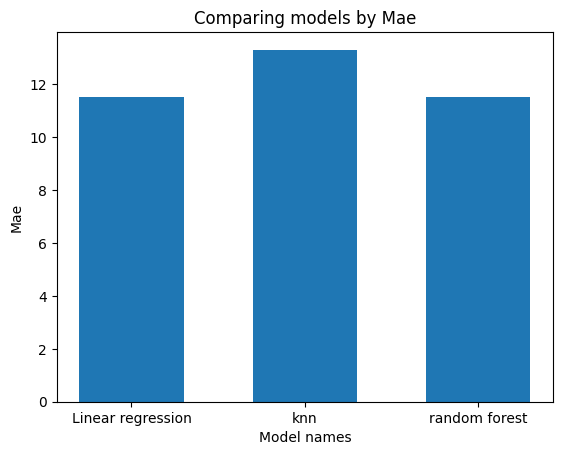

In [23]:
diffrent_models = ["Linear regression", "knn", "random forest"]
mae_values = [mae, mae_knn, mae_rf]

plt.bar(diffrent_models, mae_values, width=0.6)
plt.xlabel("Model names")
plt.ylabel("Mae")
plt.title("Comparing models by Mae")


Text(0.5, 1.0, 'Comparin models by Mse')

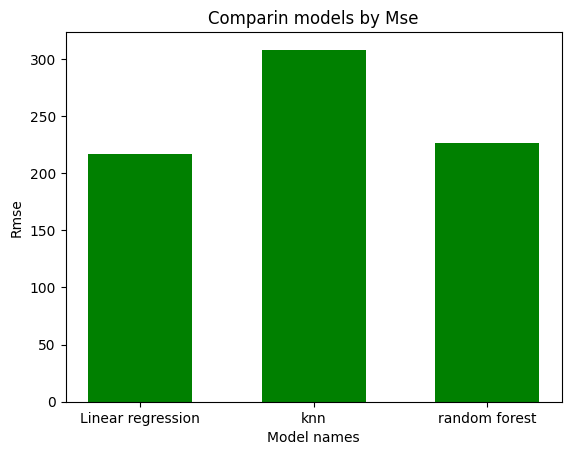

In [24]:
mse_values = [mse, mse_knn, mse_rf]

plt.bar(diffrent_models, mse_values, width=0.6, color="green")
plt.xlabel("Model names")
plt.ylabel("Rmse")
plt.title("Comparin models by Mse")


Text(0.5, 1.0, 'Comparing models by Rmse')

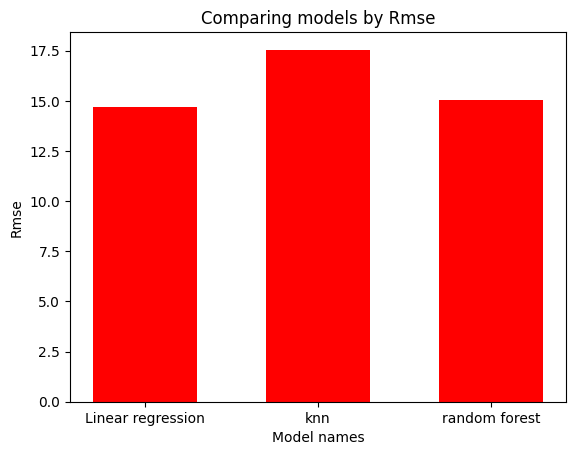

In [25]:
rmse_values = [rmse, rmse_knn, rmse_rf]

plt.bar(diffrent_models, rmse_values, width=0.6, color="red")
plt.xlabel("Model names")
plt.ylabel("Rmse")
plt.title("Comparing models by Rmse")



## Summary

### Based on the results, Linear Regression performed best, with the lowest rmse and mse and a similar mae compared to Random Forest. Knn performed worst in all metrics, so Linear Regression was chosen as the final model.

In [26]:
# Scale all data
scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)


In [27]:
chosen_model = LinearRegression()
chosen_model.fit(scaled_X, y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [34]:
from taxipred.utils.constants import JOBLIB_PATH
JOBLIB_PATH.mkdir(parents=True, exist_ok=True)


In [35]:
import joblib

joblib.dump(chosen_model, JOBLIB_PATH / "taxi_price_model.joblib")
joblib.dump(scaler, JOBLIB_PATH / "taxi_price_scaler.joblib")

['C:\\Users\\linus\\Documents\\github\\taxi-prediction-fullstack-linus\\taxipred\\src\\taxipred\\models\\taxi_price_scaler.joblib']